<a href="https://colab.research.google.com/github/zubi9/Quarter2/blob/master/Copy_of_Flowers_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assignment: Flowers Recognition <br>
Dataset Description:<br>

This dataset contains 4242 images of flowers.<br>
The data collection is based on the data flicr, google images, yandex images.<br>
You can use this datastet to recognize plants from the photo.<br>

Attribute Information:<br>
The pictures are divided into five classes: chamomile, tulip, rose, sunflower, dandelion.<br>
For each class there are about 800 photos. Photos are not high resolution, about 320x240 pixels. <br>
<b>Also explore how to resize images in tensorflow and then resize all the images to a same size. </b> <br>
This is a Multiclass Classification Problem.<br>




WORKFLOW : <br>
Load Data <br>
Split into 60 and 40 ratio.<br>
Encode labels.<br>
Create Model<br>
Compilation Step (Note : Its a Multiclass Classification problem , select loss , metrics according to it)<br>
Train the Model.<br>
If the model gets overfit tune your model by changing the units , No. of layers , epochs , add dropout layer or add Regularizer according to the need .<br>
Prediction should be > 85%<br>
Evaluation Step<br>
Prediction<br>




Data : <br>
https://drive.google.com/file/d/1-OX6wn5gA-bJpjPNfSyaYQLz-A-AB_uj/view?usp=sharing

### Modules Required

In [ ]:


import tensorflow as tf
from tensorflow import keras
from keras.utils import to_categorical
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import pathlib

import os
import cv2

from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder



### Importing Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
directory = pathlib.Path(r"/content/drive/MyDrive/data/flowers")

### seperating features and labels

#### Rescaling and filtering

In [ ]:
flowers = []
features = []
labels = []
# Iterating Over Directory To Extract Sub Directories
for dir in directory.iterdir():
  flowers.append(dir.name)
  print(dir.name)
# Iterating Over Sub Directories To Extract Lables
  for imgpath in dir.iterdir():
    if imgpath.name.endswith("jpg"):
      labels.append(dir.name)
      imgarr = cv2.imread(str(imgpath), cv2.IMREAD_GRAYSCALE)
      imgarr = cv2.resize(imgarr, (150,150))
      features.append(imgarr)

tulip
rose
dandelion
daisy
sunflower


In [ ]:
print(len(features))
print(len(labels))

4323
4323


### Labbel encoding

In [ ]:
le=LabelEncoder()
Y=le.fit_transform(labels)
Y=to_categorical(Y,5)

### converting images into tensors

In [ ]:
X=np.array(features)

In [ ]:
print(X.shape)
print(Y.shape)

(4323, 150, 150)
(4323, 5)


### viewing some samples

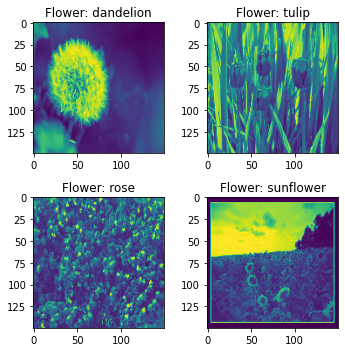

In [ ]:
import random as rn
fig,ax=plt.subplots(2,2)
fig.set_size_inches(5,5)
for i in range(2):
    for j in range (2):
        l=rn.randint(0,len(labels))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title('Flower: '+labels[l])
        
plt.tight_layout()

### Splitting test and train

In [ ]:
train_data,test_data,train_label,test_label = train_test_split( X, Y, test_size = 0.40, random_state = 42)

In [ ]:
print(train_data.shape, '\n', test_data.shape)
print()
print(train_label.shape, '\n', test_label.shape)


(2593, 150, 150) 
 (1730, 150, 150)

(2593, 5) 
 (1730, 5)


### Normalizig and changing datatype

In [ ]:
train_data = train_data.reshape((2593, 150 * 150))   #changed from 3d to 2d
train_data = train_data.astype('float32') / 255    #Normalization scale in bt 0-1
test_data = test_data.reshape((1730, 150 * 150))  #changed from 3d to 2d
test_data = test_data.astype('float32') / 255    # Normalization scale in bt 0-1

In [ ]:
print(train_data.shape, '\n', test_data.shape)
print()
print(train_label.shape, '\n', test_label.shape)

(2593, 22500) 
 (1730, 22500)

(2593, 5) 
 (1730, 5)


### Stricturing and Compiling a Model

In [ ]:
from keras import models
from keras import layers
def build_model():
    
    model = models.Sequential()
    
    model.add(layers.Dense(512, activation='relu', input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(5, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['acc'])
    
    return model


In [ ]:
model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               11520512  
_________________________________________________________________
dense_1 (Dense)              (None, 32)                16416     
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 165       
Total params: 11,538,149
Trainable params: 11,538,149
Non-trainable params: 0
_________________________________________________________________


### Training the Model

In [ ]:
model.fit(train_data, train_label, epochs=100)

Epoch 1/100
82/82 [==============================] - 4s 13ms/step - loss: 6.1522 - acc: 0.2094
Epoch 2/100
82/82 [==============================] - 1s 12ms/step - loss: 1.6050 - acc: 0.2571
Epoch 3/100
82/82 [==============================] - 1s 12ms/step - loss: 1.6027 - acc: 0.2415
Epoch 4/100
82/82 [==============================] - 1s 13ms/step - loss: 1.6023 - acc: 0.2377
Epoch 5/100
82/82 [==============================] - 1s 12ms/step - loss: 1.6051 - acc: 0.2313
Epoch 6/100
82/82 [==============================] - 1s 12ms/step - loss: 1.5998 - acc: 0.2398
Epoch 7/100
82/82 [==============================] - 1s 13ms/step - loss: 1.6004 - acc: 0.2384
Epoch 8/100
82/82 [==============================] - 1s 12ms/step - loss: 1.5999 - acc: 0.2368
Epoch 9/100
82/82 [==============================] - 1s 12ms/step - loss: 1.5955 - acc: 0.2504
Epoch 10/100
82/82 [==============================] - 1s 13ms/step - loss: 1.5984 - acc: 0.2445
Epoch 11/100
82/82 [=============================

### checking accuracy

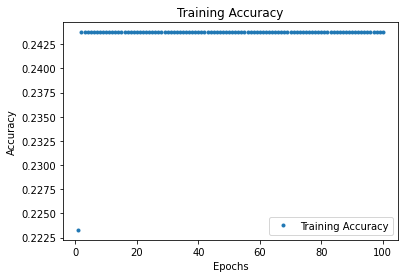

In [ ]:
history_dict = model.history.history
acc = history_dict['acc']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '.', label='Training Accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### checking Loss

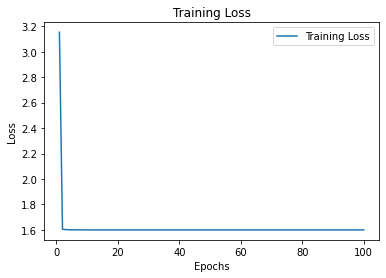

In [ ]:
history_dict = model.history.history

loss_values = history_dict['loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, '-', label='Training Loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
model.predict(test_data)

array([[0.18645373, 0.24118225, 0.17901023, 0.17220163, 0.22115217],
       [0.18645373, 0.24118225, 0.17901023, 0.17220163, 0.22115217],
       [0.18645373, 0.24118225, 0.17901023, 0.17220163, 0.22115217],
       ...,
       [0.18645373, 0.24118225, 0.17901023, 0.17220163, 0.22115217],
       [0.18645373, 0.24118225, 0.17901023, 0.17220163, 0.22115217],
       [0.18645373, 0.24118225, 0.17901023, 0.17220163, 0.22115217]],
      dtype=float32)

In [ ]:
model.evaluate(test_data, test_label)

55/55 [==============================] - 0s 5ms/step - loss: 1.5981 - acc: 0.2428


[1.5981281995773315, 0.24277456104755402]

In [ ]:
k = 4
num_val_samples = len(train_data) // k
# num_epochs = 500
num_epochs = 100
all_history = []
for i in range(k):
    print('processing fold #', i)
    
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    
    val_targets = train_label[i * num_val_samples: (i + 1) * num_val_samples]
    
    partial_train_data = np.concatenate(
            [train_data[:i * num_val_samples],
            train_data[(i + 1) * num_val_samples:]],
            axis=0)
    
    partial_train_targets = np.concatenate(
            [train_label[:i * num_val_samples],
            train_label[(i + 1) * num_val_samples:]],
            axis=0)
    
    
    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
    epochs=num_epochs, batch_size=1, verbose=0)
    all_history.append(model.history.history)
    if k == i+1:
        print("-------------Training Completed-------------")

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
-------------Training Completed-------------


In [ ]:
all_acc = []
all_loss = []
for i in all_history:
    all_acc.append(i['acc'])
    all_loss.append(i['loss'])

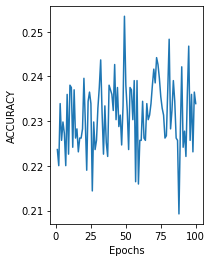

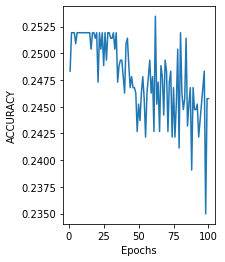

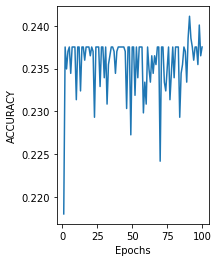

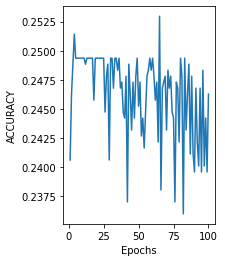

In [ ]:
acc = all_acc
for a in acc:
    plt.subplot(1, 2, 1)
    plt.plot(range(1, len(a) + 1), a)
    plt.xlabel('Epochs')
    plt.ylabel('ACCURACY')
    plt.show()

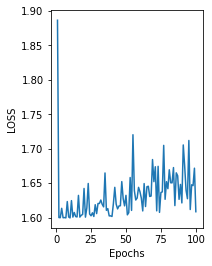

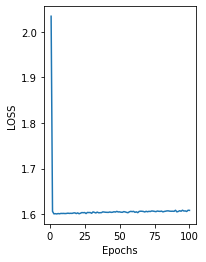

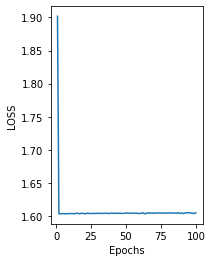

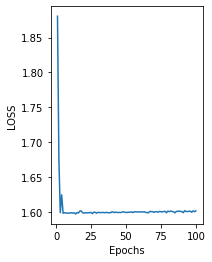

In [ ]:
loss = all_loss
for a in loss:
    plt.subplot(1, 2, 1)
    plt.plot(range(1, len(a) + 1), a)
    plt.xlabel('Epochs')
    plt.ylabel('LOSS')
    plt.show()

In [ ]:
prediction = model.predict(test_data)
prediction

array([[0.17916417, 0.24798499, 0.17434882, 0.17014511, 0.22835688],
       [0.17916417, 0.24798499, 0.17434882, 0.17014511, 0.22835688],
       [0.17916417, 0.24798499, 0.17434882, 0.17014511, 0.22835688],
       ...,
       [0.17916417, 0.24798499, 0.17434882, 0.17014511, 0.22835688],
       [0.17916417, 0.24798499, 0.17434882, 0.17014511, 0.22835688],
       [0.17916417, 0.24798499, 0.17434882, 0.17014511, 0.22835688]],
      dtype=float32)

In [ ]:
model.evaluate(test_data, test_label)

55/55 [==============================] - 0s 5ms/step - loss: 1.6004 - acc: 0.2434


[1.6004027128219604, 0.24335260689258575]